EXPLORATORY DATA ANALYSIS ON INC_5000_2017 DATASET
-----------------------------------------------

Exploratory Data Analysis on Private company's Growth, HeadCount and Revenue(millions) for the year 2017. Determining the statewise representation of the above variables is the aim of this analysis.


In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns

# Make plots larger
plt.rcParams['figure.figsize'] = (15, 9)

In [2]:
df = pd.read_csv('inc5000-2017.csv')

In [3]:
df.head()


,year,rank,name,url,founded,street1,city,state,zip,revenue(ml),% growth,Headcount
0,2017,1524,Surety One,suretyone.com,1/1/2011,404 Ave. de la Constitucion Suite 708,San Juan,PR,901,4.0,264,10
1,2017,816,Connect Assistance,cra.pr,1/1/2012,701 AVE PONCE DE LEON CENTRO DE SEGUROS 305,San Juan,PR,907,4.5,553,50
2,2017,3566,Wovenware,wovenware.com,1/1/2003,601 Calle Del Parque St. Ste. 200 Edf. Pesquera,San Juan,PR,909,4.0,86,50
3,2017,3319,CommunicateHealth,communicatehealth.com,1/1/2009,26 Market St.,Northampton,MA,1060,5.5,96,37
4,2017,4735,MTD Micro Molding,mtdmicromolding.com,1/1/1972,15 Trolley Crossing Rd,Charlton,MA,1507,7.2,48,33


In [4]:
df.shape

(5001, 12)

In [5]:
df.describe()

,year,rank,zip,revenue(ml),% growth,Headcount
count,5001.0,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,2017.0,2499.894021,50644.065187,31.746031,481.552689,256.291142
std,0.0,1443.767915,30423.359429,72.102154,1577.968202,2414.437644
min,2017.0,1.000000,901.000000,1.000000,40.000000,0.000000
25%,2017.0,1250.000000,22314.000000,4.600000,79.000000,23.000000
50%,2017.0,2499.000000,46120.000000,10.000000,142.000000,49.000000
75%,2017.0,3750.000000,80020.000000,27.200000,327.000000,125.000000
max,2017.0,5000.000000,99501.000000,996.700000,50059.000000,140000.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 12 columns):
year           5001 non-null int64
rank           5001 non-null int64
name           5001 non-null object
url            4999 non-null object
founded        5001 non-null object
street1        5001 non-null object
city           5001 non-null object
state          5001 non-null object
zip            5001 non-null int64
revenue(ml)    5001 non-null float64
% growth       5001 non-null int64
Headcount      5001 non-null int64
dtypes: float64(1), int64(5), object(6)
memory usage: 468.9+ KB


All the above operations were used to load the csv file into the dataframe.
Identify what are all the data types and values, number of columns and rows.
Finally some general information regarding the dataset.


--------------------------------------------------------------------------------------------------------------------------------

In [7]:
df.isnull().values.any()

True

In [8]:
df.isnull().sum()

year           0
rank           0
name           0
url            2
founded        0
street1        0
city           0
state          0
zip            0
revenue(ml)    0
% growth       0
Headcount      0
dtype: int64

The above 2 operations where used to check to see if there were any null/ NAN values in the dataset.
There are no missing values but the values might not be relative or inconsistent values.

--------------------------------------------------------------------------------------------------------------------------------
*****Regarding replacing missing values and inappropriate values, the columns that really matter do not have such problems( ie., growth, revenue and headcount they do not have any problems regarding inappropriate values) and so on we can move on with removing/imputing the data that does not contribute to the solution.

---------------------------------------------------------------------------------------------------------------------------
The below steps are used to check whether any of the rows have to be eliminated for perfectly fitting the data in view of exploratory data analysis and later to apply machine learning algorithms on that dataset.

# Distribution plot before making changes to the data frame

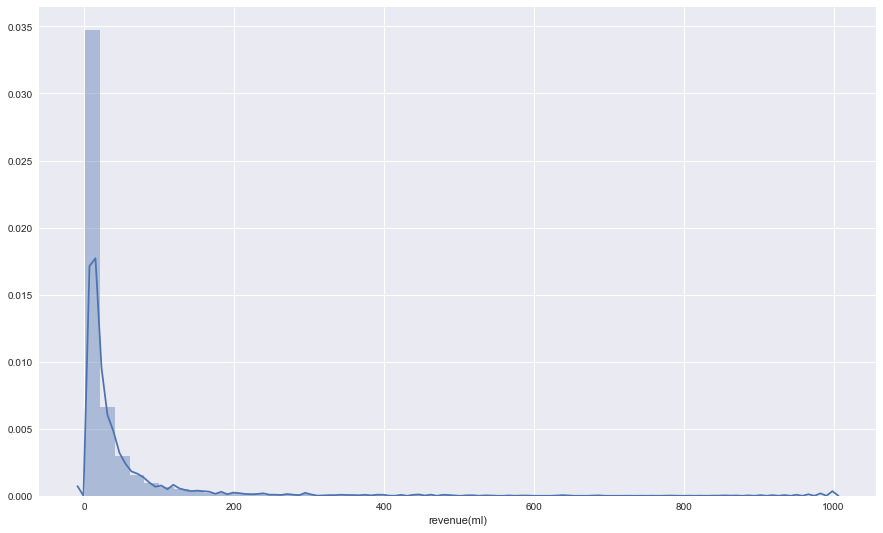

In [9]:
sns.distplot(df['revenue(ml)'])
plt.show()

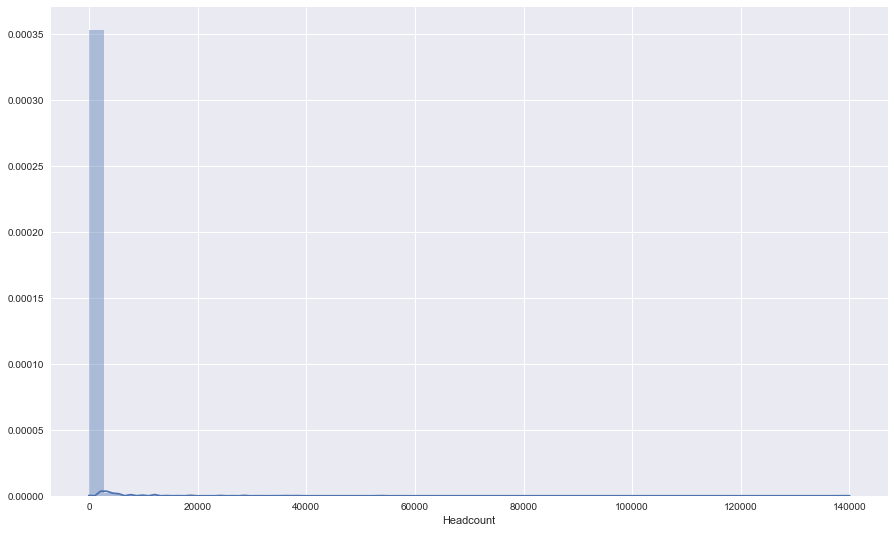

In [10]:
sns.distplot(df['Headcount'])
plt.show()

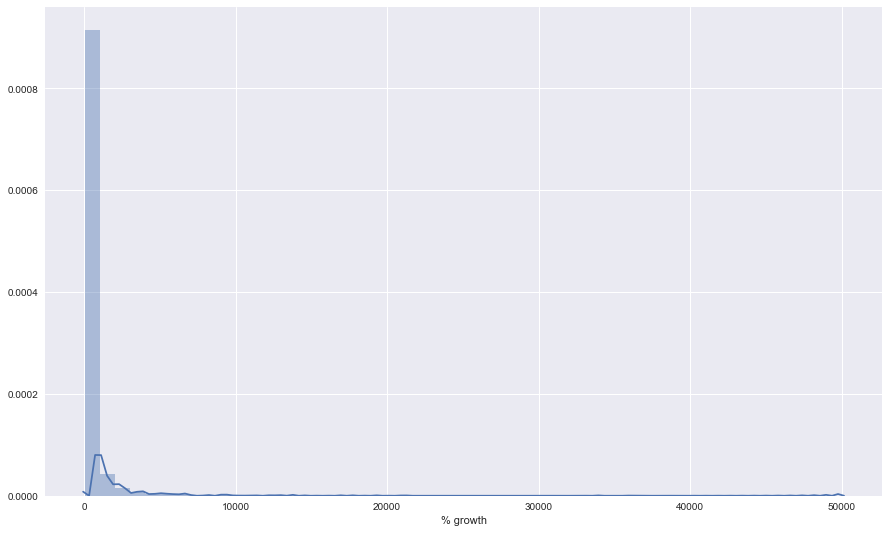

In [11]:
sns.distplot(df['% growth'])
plt.show()

The above distribution plots show us that some part of the data is very skewed and those sections of the dataset will affect the outcome of the machine learning algorithm and thereby it's best that those data are imputed for optimal/efficient outcomes.

In [12]:
df.groupby('revenue(ml)').size()

revenue(ml)
1.0       1
1.1       4
1.2       2
1.3       5
1.5       2
1.6       1
1.7       4
1.8       1
1.9       4
2.0      55
2.1      74
2.2      61
2.3      41
2.4      50
2.5      57
2.6      41
2.7      49
2.8      37
2.9      49
3.0      47
3.1      54
3.2      44
3.3      46
3.4      52
3.5      44
3.6      46
3.7      34
3.8      41
3.9      41
4.0      50
         ..
463.2     1
479.0     1
479.2     1
481.5     1
485.4     1
488.7     1
491.5     1
513.4     1
514.3     1
516.7     1
535.5     1
542.2     1
565.6     1
579.9     1
591.5     1
628.7     1
639.1     1
640.4     1
644.5     1
683.8     1
685.3     1
782.8     1
846.5     1
857.1     1
864.4     1
880.4     1
899.6     1
924.3     1
974.0     1
996.7     1
Length: 1033, dtype: int64

The above is just an example of how skewed the dataset, where the companies generating certain specific revenues are very less and that does not contribute to the solution. That type of data is supposed to be removed.
The above group by() function was performed just as an example to demonstrate how the data is grouped based on revenue generated on the left and number of companies on the right.

In [13]:
df.describe()


,year,rank,zip,revenue(ml),% growth,Headcount
count,5001.0,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,2017.0,2499.894021,50644.065187,31.746031,481.552689,256.291142
std,0.0,1443.767915,30423.359429,72.102154,1577.968202,2414.437644
min,2017.0,1.000000,901.000000,1.000000,40.000000,0.000000
25%,2017.0,1250.000000,22314.000000,4.600000,79.000000,23.000000
50%,2017.0,2499.000000,46120.000000,10.000000,142.000000,49.000000
75%,2017.0,3750.000000,80020.000000,27.200000,327.000000,125.000000
max,2017.0,5000.000000,99501.000000,996.700000,50059.000000,140000.000000


In [14]:
drop_cols = ['year', 'rank', 'zip','name', 'url', 'founded', 'street1', 'city', 'state']
data = df.drop(drop_cols, axis=1)

The above command is used to drop the columns that are not neccesary for the following operations.

In [15]:
data.describe()

,revenue(ml),% growth,Headcount
count,5001.000000,5001.000000,5001.000000
mean,31.746031,481.552689,256.291142
std,72.102154,1577.968202,2414.437644
min,1.000000,40.000000,0.000000
25%,4.600000,79.000000,23.000000
50%,10.000000,142.000000,49.000000
75%,27.200000,327.000000,125.000000
max,996.700000,50059.000000,140000.000000


In [16]:
data = data.rename(columns={'revenue(ml)':'revenue', '% growth':'growth'})

In [17]:
data = data[data.revenue <36]

In [18]:
data = data[data.growth <600]

In [19]:
data = data[data.Headcount <300]

In [20]:
data.describe()

,revenue,growth,Headcount
count,3199.000000,3199.000000,3199.000000
mean,10.233604,166.310722,55.856830
std,8.216556,126.596535,52.898443
min,1.300000,40.000000,0.000000
25%,4.000000,74.000000,20.000000
50%,7.200000,120.000000,36.000000
75%,14.000000,219.500000,73.000000
max,35.800000,599.000000,291.000000


After the dataset is imputed from all the skewed values, we have the data that is of good consistency and can be used in our dist plots to identify the type of distribution and further be used for application of algorithms.

# Distribution after imputing the unecessary data from the dataframe

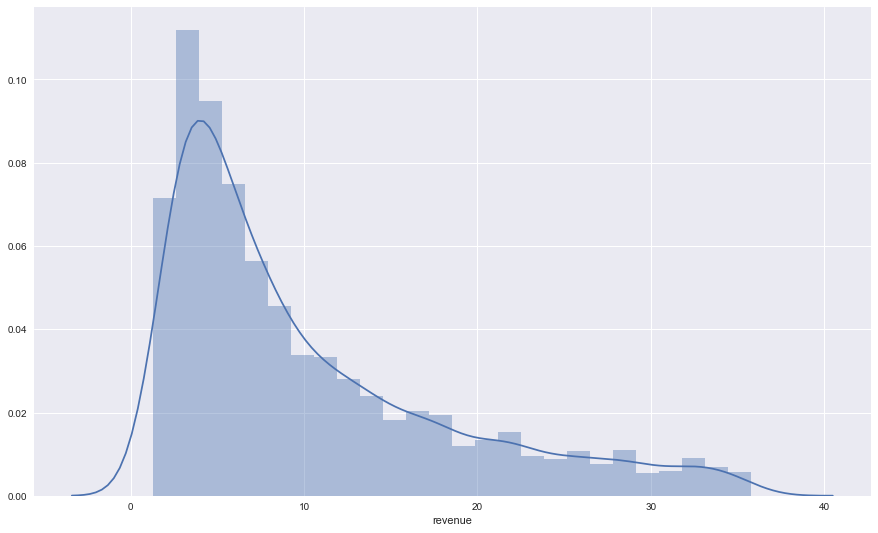

In [21]:
sns.distplot(data['revenue'])
plt.show()

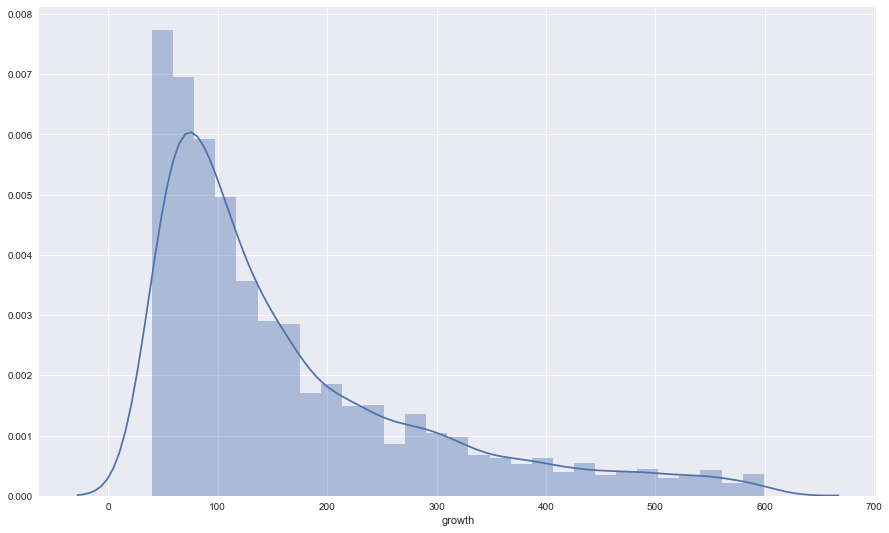

In [22]:
sns.distplot(data['growth'])
plt.show()

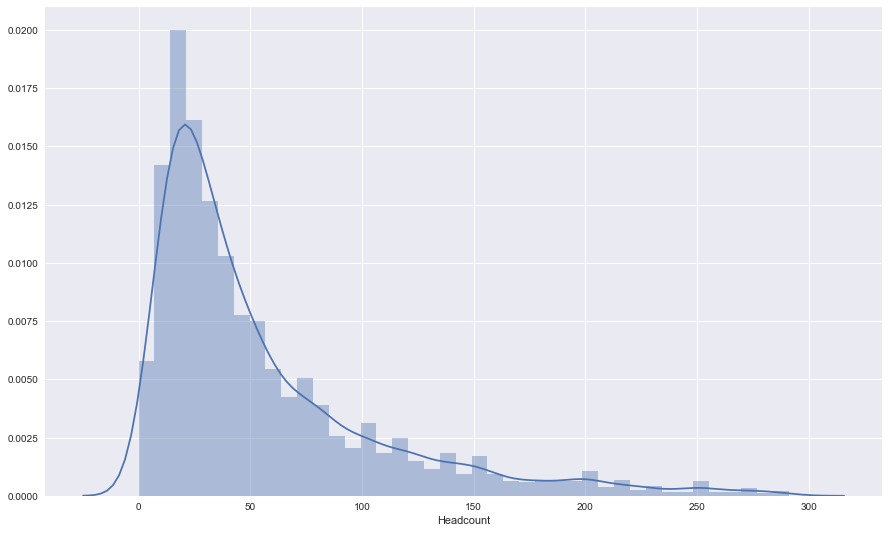

In [23]:
sns.distplot(data['Headcount'])
plt.show()

All the above distributions show the density and how the data after imputing is travelling. All the distributions have a hike in the beginning and gradually decrease towards the end and this shows that the distribution is of type - Gamma Distribution.
________________________________________________________________________________________________________________________________

# Describing the dataset after imputing the irrelavent data

In [24]:
data.describe()

,revenue,growth,Headcount
count,3199.000000,3199.000000,3199.000000
mean,10.233604,166.310722,55.856830
std,8.216556,126.596535,52.898443
min,1.300000,40.000000,0.000000
25%,4.000000,74.000000,20.000000
50%,7.200000,120.000000,36.000000
75%,14.000000,219.500000,73.000000
max,35.800000,599.000000,291.000000


Statistics of the dataset using describe() function after imputing the bad data -
There are 3199 rows in the dataset with an mean values of all the three columns, the standard deviation occurs at various points on the data.
There are companies that have a min revenue, growth and headcount values given and also interval values at 25%, 50%, 75% and the max values.
We can infer many details from the above given function.
________________________________________________________________________________________________________________________________


# Determining the outliers before data imputation 

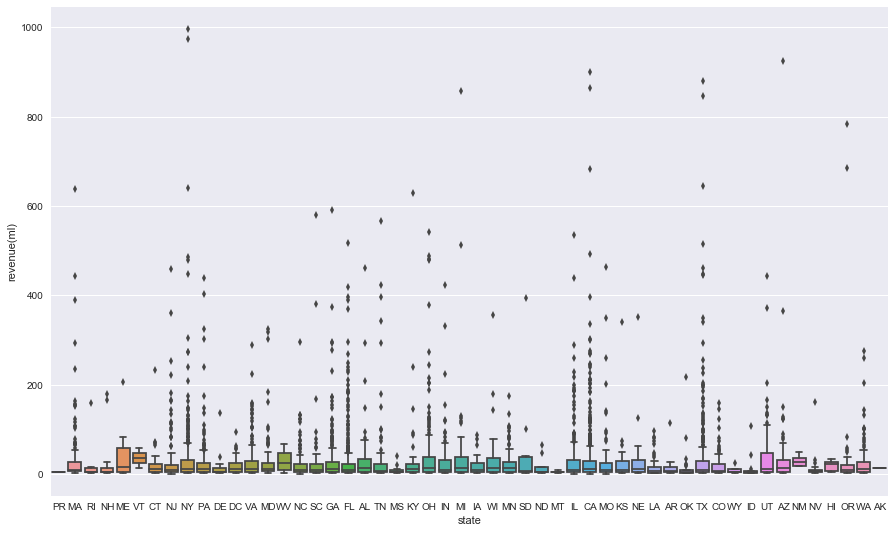

In [25]:
sns.boxplot(x="state", y="revenue(ml)", data=df)
plt.show()


As the above box plot shows us the relationship between various states and the revenue generated by them during the year 2017.
And the plot is very skewed beacuse of the presence of so many outliers and we would get a good plot if the average revenue(ml) taken is less than 200 million. updated version of the box plot will be developed and presented below

In [26]:
df.describe()

,year,rank,zip,revenue(ml),% growth,Headcount
count,5001.0,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,2017.0,2499.894021,50644.065187,31.746031,481.552689,256.291142
std,0.0,1443.767915,30423.359429,72.102154,1577.968202,2414.437644
min,2017.0,1.000000,901.000000,1.000000,40.000000,0.000000
25%,2017.0,1250.000000,22314.000000,4.600000,79.000000,23.000000
50%,2017.0,2499.000000,46120.000000,10.000000,142.000000,49.000000
75%,2017.0,3750.000000,80020.000000,27.200000,327.000000,125.000000
max,2017.0,5000.000000,99501.000000,996.700000,50059.000000,140000.000000


In correspondance with the box plot and the above describe function we can identify many outliers therfore to enhance the usage of data and to provide a better EDA, I have performed some amount of data cleaning by removing outliers based on the information given above and the code to do so is given below.

In [27]:
df = df.rename(columns={'revenue(ml)':'revenue', '% growth':'growth'})
df = df[df.Headcount <300]
df = df[df.revenue <36]
df = df[df.growth <600]


In [28]:
df.describe()

,year,rank,zip,revenue,growth,Headcount
count,3199.0,3199.000000,3199.000000,3199.000000,3199.000000,3199.000000
mean,2017.0,2849.484839,50017.713035,10.233604,166.310722,55.856830
std,0.0,1228.395222,30218.595882,8.216556,126.596535,52.898443
min,2017.0,759.000000,901.000000,1.300000,40.000000,0.000000
25%,2017.0,1770.500000,22314.000000,4.000000,74.000000,20.000000
50%,2017.0,2849.000000,45040.000000,7.200000,120.000000,36.000000
75%,2017.0,3907.500000,78739.500000,14.000000,219.500000,73.000000
max,2017.0,5000.000000,99501.000000,35.800000,599.000000,291.000000


After cleaning the data of most of the outliers, we can see a difference in values in the describe function and now we can use a box plot to check for more anomalies/outliers and go about making decisions for the next process.

# Determining the outliers after data imputation

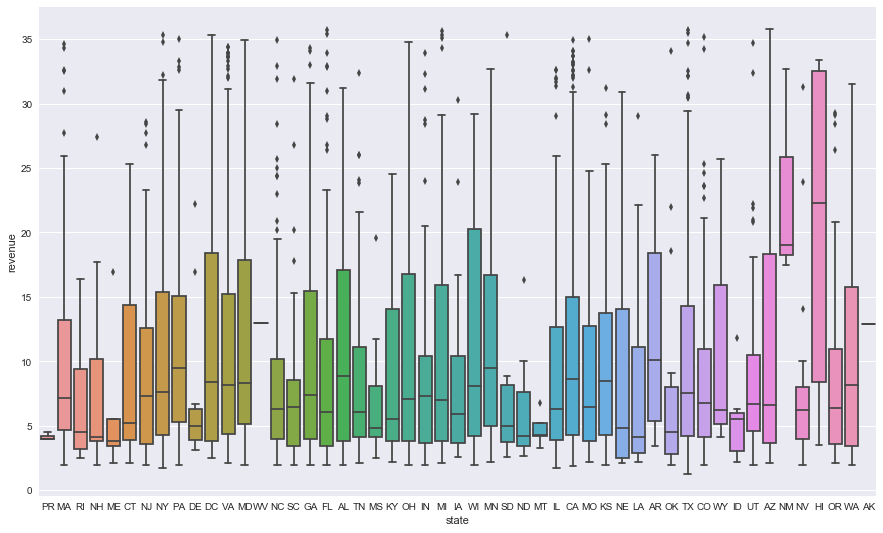

In [29]:
sns.boxplot(x="state", y="revenue", data=df)
plt.show()

After we take down the far-fetched values, now we can identify a good box-plot and can make valuable assumptions on the graph above. Taking into account the previous box plot, so many outliers have been removed, now the data can be used for other charts representations.
_______________________________________________________________________________________________________________________________

# Bar charts for understanding the data distribution against each desciding variable

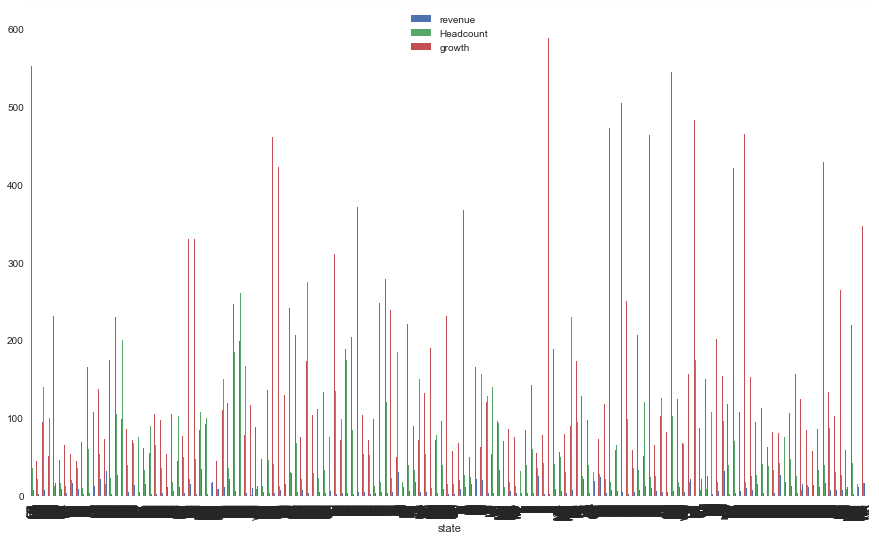

In [30]:
df.plot(x="state", y=["revenue", "Headcount", "growth"], kind="bar")
plt.show()

Now we can take insights from the bar graph, which shows the state wise representation of revenue, headcount and growth and due to the large amount of states and data, we are not able to get a good readable graph and to view thw graph properly, we can take few sets of data and apply the graph on top of that dataset.
________________________________________________________________________________________________________________________________
As i have done below, here is the bar graph for statewise top 10 representation of revenue, Headcount and growth for more legible understanding of the relationship.

      year  rank                                name                      url  \
4000  2017  1651                     VINCENTBENJAMIN      vincentbenjamin.com   
1763  2017  4878  Information and Computing Services                icsfl.com   
3445  2017  2700                               THMED        thmedstaffing.com   
2642  2017  4497             Grand Equipment Company       grandequipment.com   
3325  2017  3543                               CONTI             contiorg.com   
2006  2017  4021                        AgileThought         agilethought.com   
574   2017  3029         Brooklyn Low Voltage Supply                 blvs.com   
2628  2017  4702                Edgewater Automation  edgewaterautomation.com   
2830  2017  4316                      Diamond Mowers        diamondmowers.com   
907   2017  3827                       JMA Solutions        jma-solutions.com   

       founded                                 street1          city state  \
4000  1/1/2008          2415 E

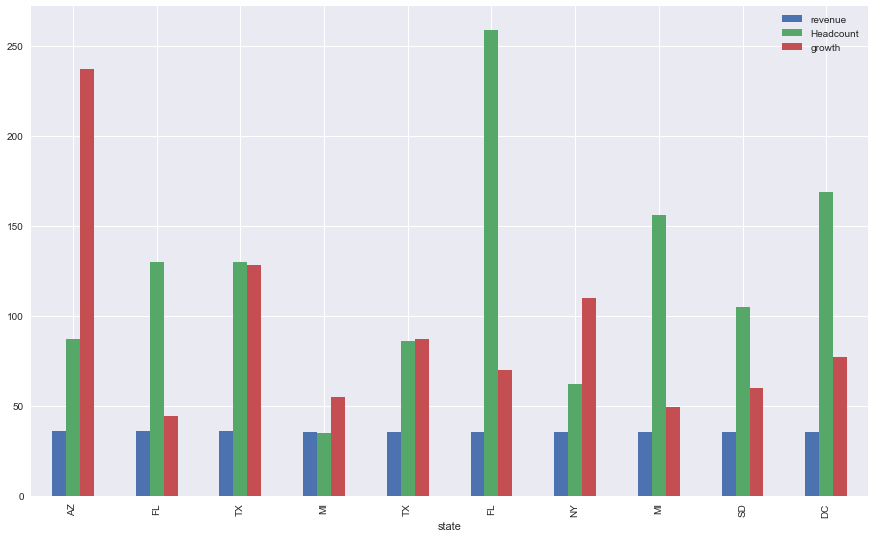

In [31]:
tempData = df.sort_values('revenue', ascending=False)
revData = tempData.head(10)
print(revData)
revData.plot(x="state", y=["revenue", "Headcount", "growth"], kind="bar")
plt.show()

The highest revenue generated by top 10 companies from various states are displayed
1. They generate revenue because the head count is high in those orgnizations as well as the growth rate in some cases.
2. In some cases the growth rate is less when compared to the Headcount, it may be due to the fact that they are well established organizations and the growth is limited.


      year  rank                           name                          url  \
1327  2017  1819              ITA INternational                 ita-intl.com   
2919  2017  3766             AMEEX TECHNOLOGIES                 ameexusa.com   
1141  2017  3272  MicroSystems Automation Group                     msag.net   
2675  2017  3327                       MediRevv                 medirevv.com   
3407  2017  1823                  PROLIM Global                   prolim.com   
4199  2017  2698                       Wpromote                 wpromote.com   
1966  2017  3714       professional concessions  professionalconcessions.com   
656   2017  4505                Optimax Systems                optimaxsi.com   
3690  2017  4120                   milk + honey          milkandhoneyspa.com   
2772  2017  2188              Renters Warehouse         renterswarehouse.com   

       founded                                            street1  \
1327  1/1/2005                      112 Cybernetic

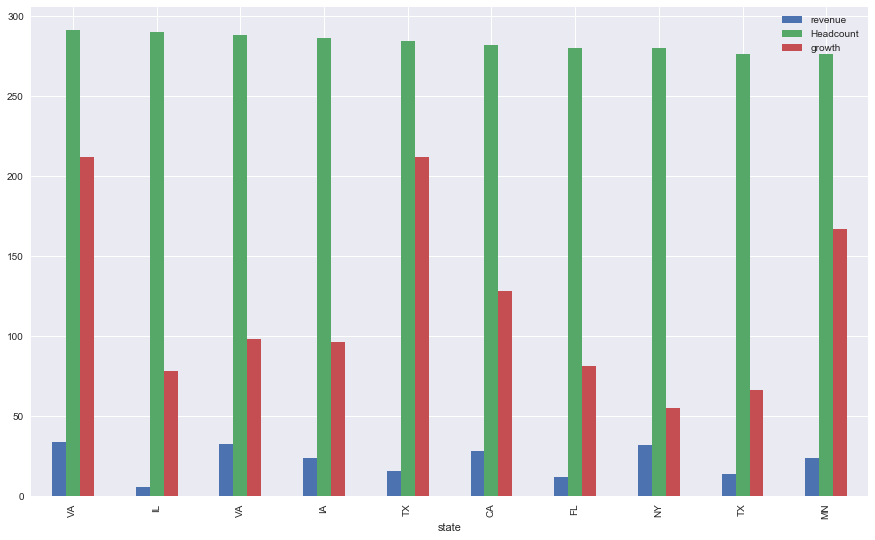

In [32]:
tempData = df.sort_values('Headcount', ascending=False)
hcData = tempData.head(10)
print(hcData)

hcData.plot(x="state", y=["revenue", "Headcount", "growth"], kind="bar")
plt.show()

The highest Headcount by top 10 companies from various states are displayed
1. The high headcount in the above states sepcify that they recruit many people and benefits for employees are high and generous.
2. In most of the cases the growth rate is lower than the headcount, showing that those organizations have recruited higher number of personnel than required.
3. The revenue generated by them is also very moderate as they may be start ups that have just begun with their processes.

      year  rank                                  name                   url  \
3026  2017   759                    Tiesta Tea Company  http://tiestatea.com   
4059  2017   760                              SiteLock          sitelock.com   
3931  2017   761                         Mac Warehouse     mac-warehouse.com   
959   2017   764  Greensmith Energy Management Systems  greensmithenergy.com   
1227  2017   763                            SweatWorks        sweatworks.net   
254   2017   762                                Fusion         fusion-ge.com   
1676  2017   765                     Crisp Video Group        crispvideo.com   
107   2017   769                 Chicken and Rice Guys           cnrguys.com   
3485  2017   771                        defi SOLUTIONS     defisolutions.com   
2443  2017   770       STACK Construction Technologies           stackct.com   

       founded                             street1        city state    zip  \
3026  1/1/2010    213 W. Institute Place

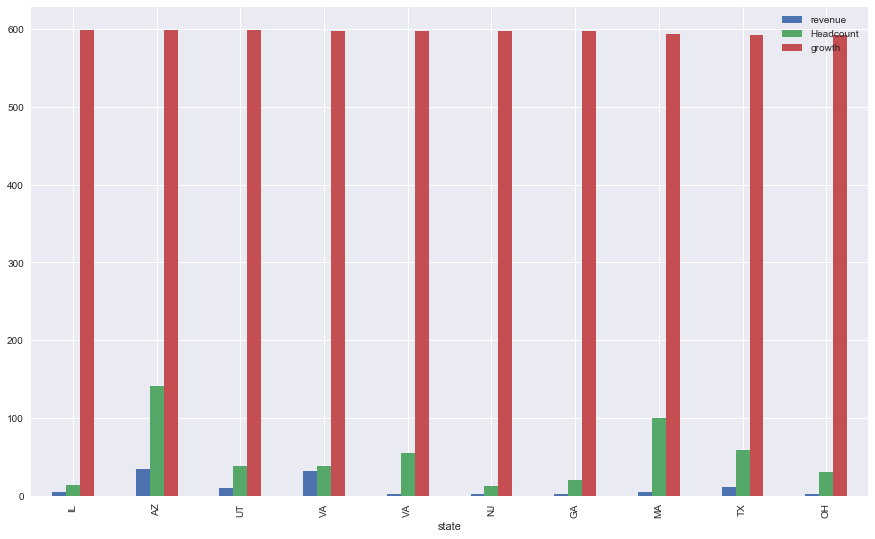

In [33]:
tempData = df.sort_values('growth', ascending=False)
gData = tempData.head(10)
print(gData)

gData.plot(x="state", y=["revenue", "Headcount", "growth"], kind="bar")
plt.show()

The highest growth rate by top 10 companies from various states are displayed
1. They all have less revenue and less head count showing that they are companies that are just rising and will take time to settle down.
2. These type of companies will work really hard and hence their growth rate is high and their revenue generated is less.
3. Also the employees will have to put in so much of work when compared to others, as they are less in number and high in growth rate.
________________________________________________________________________________________________________________________________

# Pair plot showing the correlations between 3 main variables

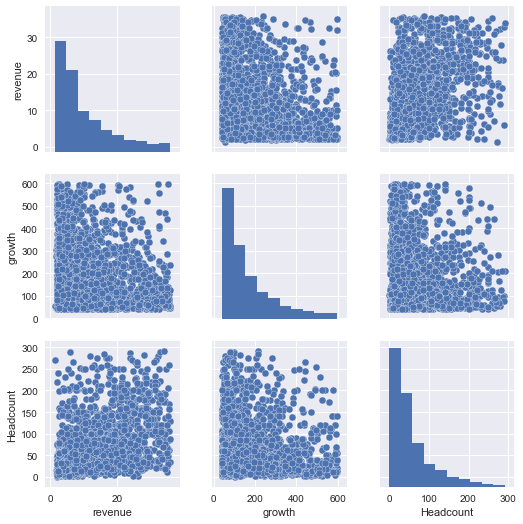

In [34]:
sns.pairplot(data)
plt.show()


Now we can check to see if there are any correlations between the 3 variables revenue, growth and headcount.
So I have used a pair plot here and it shows that 
1. Revenue and headcount are relatively correlated and vice-versa.
2. Revenue and growth are not very correlated except a bunch of data.
3. Headcount and growth are even less correlated with the exception of a few datasets.

# Heat map to show the correlation 

            revenue    growth  Headcount
revenue    1.000000 -0.084622   0.551358
growth    -0.084622  1.000000  -0.040853
Headcount  0.551358 -0.040853   1.000000


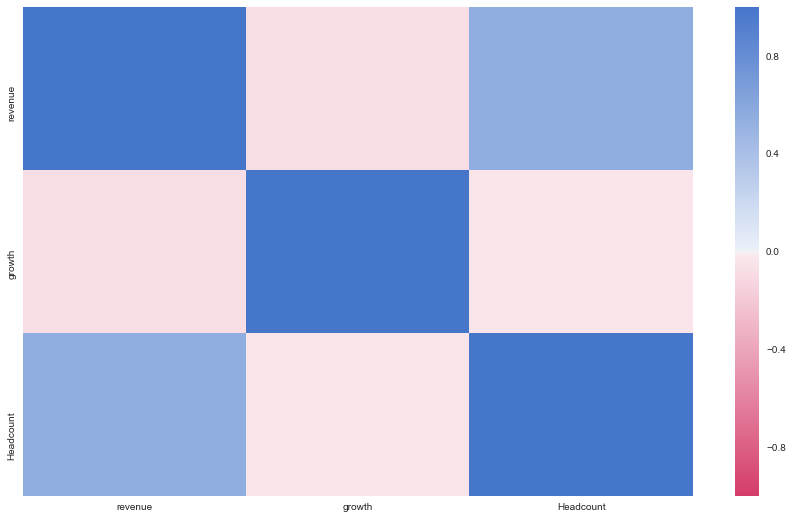

In [35]:
cmap = sns.diverging_palette(0, 255, sep=1, n=256, as_cmap=True)

correlations = data[['revenue', 'growth', 'Headcount']].corr()
print (correlations)
sns.heatmap(correlations, cmap=cmap)
plt.show()

The Heat map also gives us the same inference as the pair plot and we can conclude that there is some amount of correlation between all the 3 variables.